In [1]:
!unzip "/content/Copy of Copy of devnagari digit.zip"

Streaming output truncated to the last 5000 lines.
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10299.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10300.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10301.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10302.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10303.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10304.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10306.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/10307.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104017.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104018.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104019.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104021.png  
  inflating: DevanagariHandwrittenDigitDataset/Train/digit_7/104023.p

#Exercise: Building a Fully Connected Network (FCN) for Devnagari Digit Classification.


In [39]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from PIL import Image
import matplotlib.pyplot as plt

Task 1: Data Preparation


DATASET INFORMATION 
Training set shape: (17000, 784), labels: (17000, 10)
Testing set shape: (3000, 784), labels: (3000, 10)


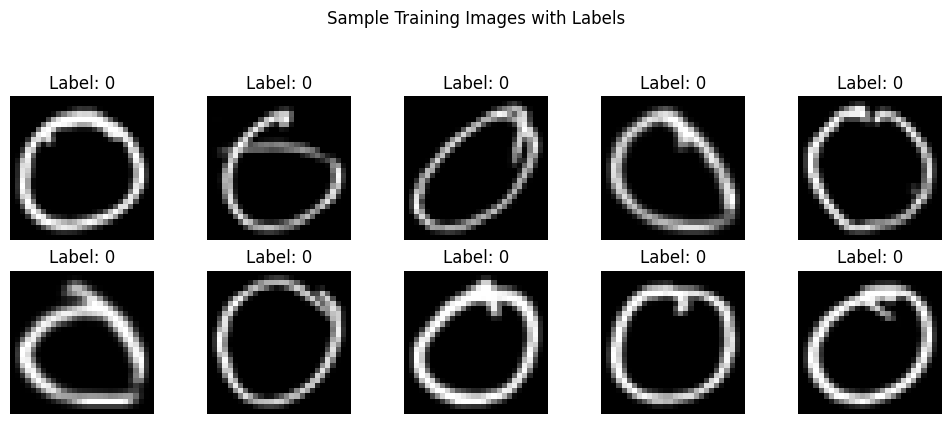

In [40]:
def load_images_from_folder(folder):
    """Load and preprocess images from directory structure"""
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))
    class_map = {name: i for i, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)

            # Load and preprocess image
            img = Image.open(img_path).convert("L")  # Grayscale
            img = img.resize((28, 28))  # Resize
            img = np.array(img) / 255.0  # Normalize

            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load datasets
train_dir = "/content/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/DevanagariHandwrittenDigitDataset/Test"


x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape and preprocess
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Deliverable: Dataset information
print("DATASET INFORMATION ")
print(f"Training set shape: {x_train.shape}, labels: {y_train.shape}")
print(f"Testing set shape: {x_test.shape}, labels: {y_test.shape}")

# Deliverable: Sample images visualization
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.suptitle("Sample Training Images with Labels", y=1.05)
plt.tight_layout()
plt.savefig("sample_images.png")
plt.show()

Task 2

In [41]:
def build_model():
    """Construct the FCN model with specified architecture"""
    model = keras.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(64, activation="sigmoid"),
        layers.Dense(128, activation="sigmoid"),
        layers.Dense(256, activation="sigmoid"),
        layers.Dense(10, activation="softmax")
    ])
    return model

model = build_model()

# Deliverable: Model architecture summary
print("MODEL ARCHITECTURE ")
model.summary()

MODEL ARCHITECTURE 


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

Task 3

In [42]:
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

print("Model compiled with Adam optimizer and categorical crossentropy loss")

Model compiled with Adam optimizer and categorical crossentropy loss


Task4

Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3002 - loss: 2.0022
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model.h5


107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.3020 - loss: 1.9989 - val_accuracy: 0.0000e+00 - val_loss: 7.5464
Epoch 2/20
 95/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8164 - loss: 0.6338
Epoch 2: val_accuracy did not improve from 0.00000
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8196 - loss: 0.6187 - val_accuracy: 0.0000e+00 - val_loss: 8.8907
Epoch 3/20
104/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9078 - loss: 0.3046
Epoch 3: val_accuracy did not improve from 0.00000
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9083 - loss: 0.3034 - val_accuracy: 0.0000e+00 - val_loss: 9.5380
Epoch 4/20
102/107 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9468 - loss: 0.1994
Epoch 4: val_accuracy did not improve from 0.00000
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9469 - loss: 0.1989 - val_accuracy: 0.0000e+00 - val_loss: 10.0044
Epoch 4: early stopping
Restoring model weights from the end of the best epoch: 1.
TRAINING HISTORY VIS

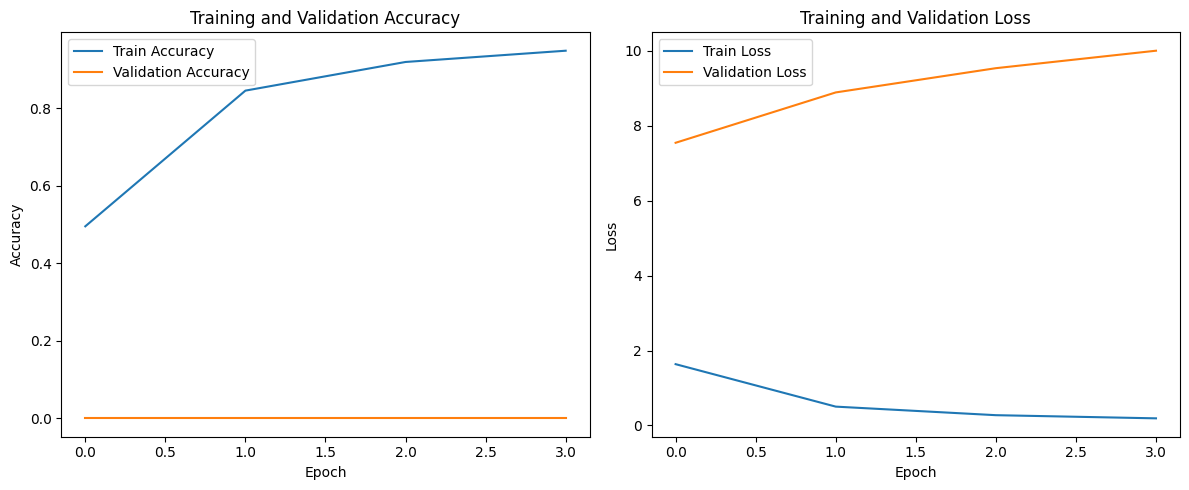

In [43]:
batch_size = 128
epochs = 20

callbacks = [
    ModelCheckpoint(
        filepath="best_model.h5",
        monitor="val_accuracy",
        save_best_only=True,
        mode="max",
        verbose=1
    ),
    EarlyStopping(
        monitor="val_loss",
        patience=3,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Deliverable: Training history visualization
print("TRAINING HISTORY VISUALIZATION")

plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.savefig("training_history.png")
plt.show()

Task5

In [44]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)

# Deliverable: Test accuracy
print("TEST ACCURACY")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

TEST ACCURACY
Test Accuracy: 0.6300
Test Loss: 2.1558


Task6

In [45]:
model.save("devnagari_digit_model.h5")
print("Model saved as 'devnagari_digit_model.h5'")

# Load and verify
loaded_model = keras.models.load_model("devnagari_digit_model.h5")
loaded_test_loss, loaded_test_acc = loaded_model.evaluate(x_test, y_test, verbose=0)

# Deliverable: Model verification after loading
print("MODEL VERIFICATION ")
print(f"Loaded Model Test Accuracy: {loaded_test_acc:.4f}")
print(f"Loaded Model Test Loss: {loaded_test_loss:.4f}")

Model saved as 'devnagari_digit_model.h5'
MODEL VERIFICATION 
Loaded Model Test Accuracy: 0.6300
Loaded Model Test Loss: 2.1558


Task7

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

=== DELIVERABLE: SAMPLE PREDICTIONS 


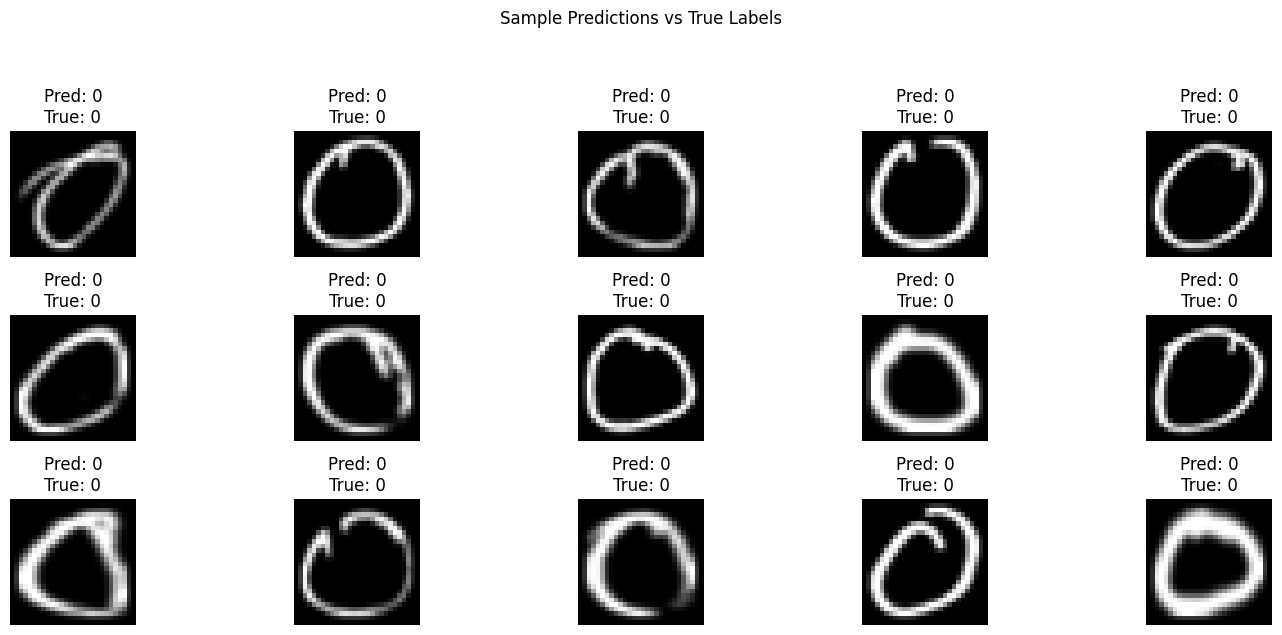


Confusion Matrix:
[[297   1   0   0   1   0   0   1   0   0]
 [  1 295   2   0   2   0   0   0   0   0]
 [  0   9 256   7   1  21   4   2   0   0]
 [  0   5 191  41   0  59   3   1   0   0]
 [  0   5   2   0 281   7   5   0   0   0]
 [  0   0  33   2   4 256   5   0   0   0]
 [  1   7  14   5   0   6 236  31   0   0]
 [ 60   1   0   0   0   9   2 228   0   0]
 [134  59  27   0  29   6  15  30   0   0]
 [ 62 153   9   0  39   8  15  14   0   0]]


In [50]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Deliverable: Sample predictions visualization
print("\n=== DELIVERABLE: SAMPLE PREDICTIONS ")

plt.figure(figsize=(15, 6))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}")
    plt.axis("off")
plt.suptitle("Sample Predictions vs True Labels", y=1.05)
plt.tight_layout()
plt.savefig("sample_predictions.png")
plt.show()

# Confusion matrix for additional insight
print("\nConfusion Matrix:")
confusion_mtx = tf.math.confusion_matrix(true_labels, predicted_labels)
print(confusion_mtx.numpy())